Epoch 1/5


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8637 - loss: 0.6935 - val_accuracy: 0.9324 - val_loss: 0.2850
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8865 - loss: 0.3236 - val_accuracy: 0.9324 - val_loss: 0.2980
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8756 - loss: 0.2115 - val_accuracy: 0.9324 - val_loss: 0.2960
Epoch 4/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9834 - loss: 0.1030 - val_accuracy: 0.9324 - val_loss: 0.3309
Epoch 5/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9923 - loss: 0.0385 - val_accuracy: 0.9324 - val_loss: 0.3762
Epoch 1/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6828 - loss: 0.8705 - val_accuracy: 0.9324 - val_loss: 0.2813
Epoch 2/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8879 - loss: 0.3995 - val_accuracy: 0.9324 - val_loss: 0.3153
Epoch 3/5
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8755 - loss: 0.3786 - val_accuracy: 0.9324 - val_loss: 0.3031
Ep

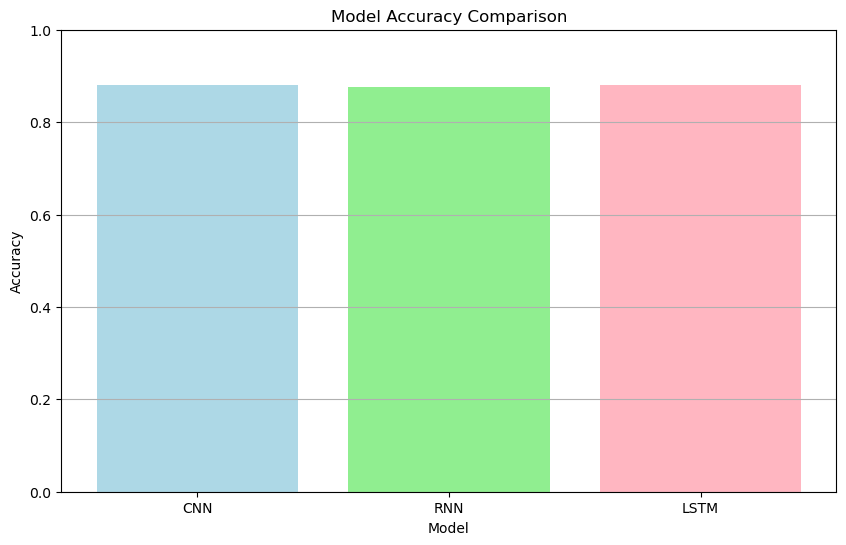

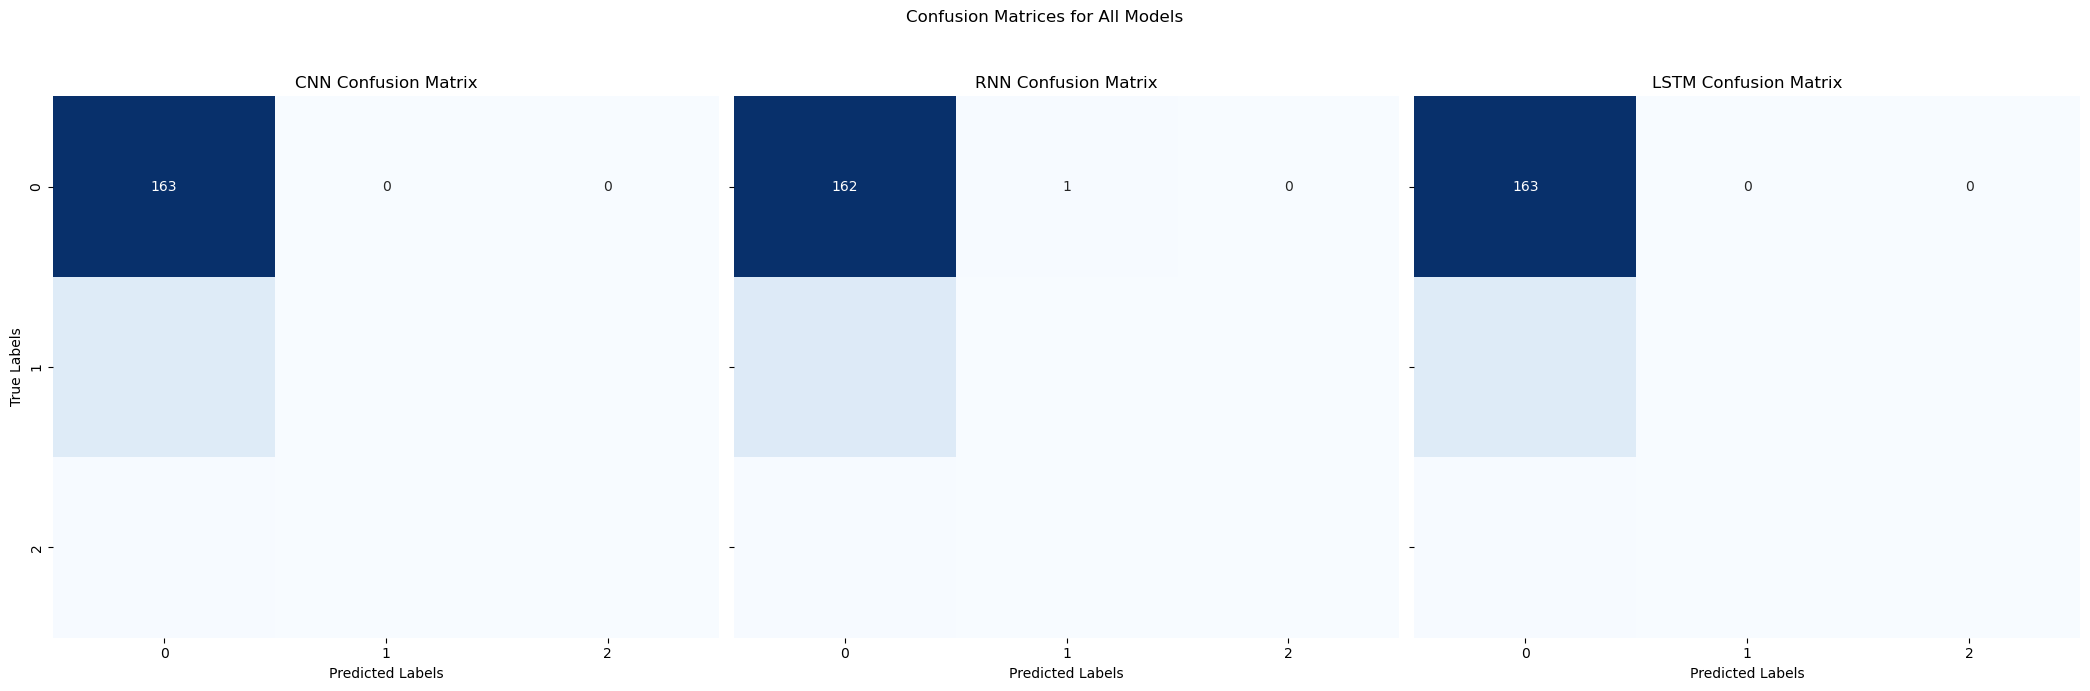

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


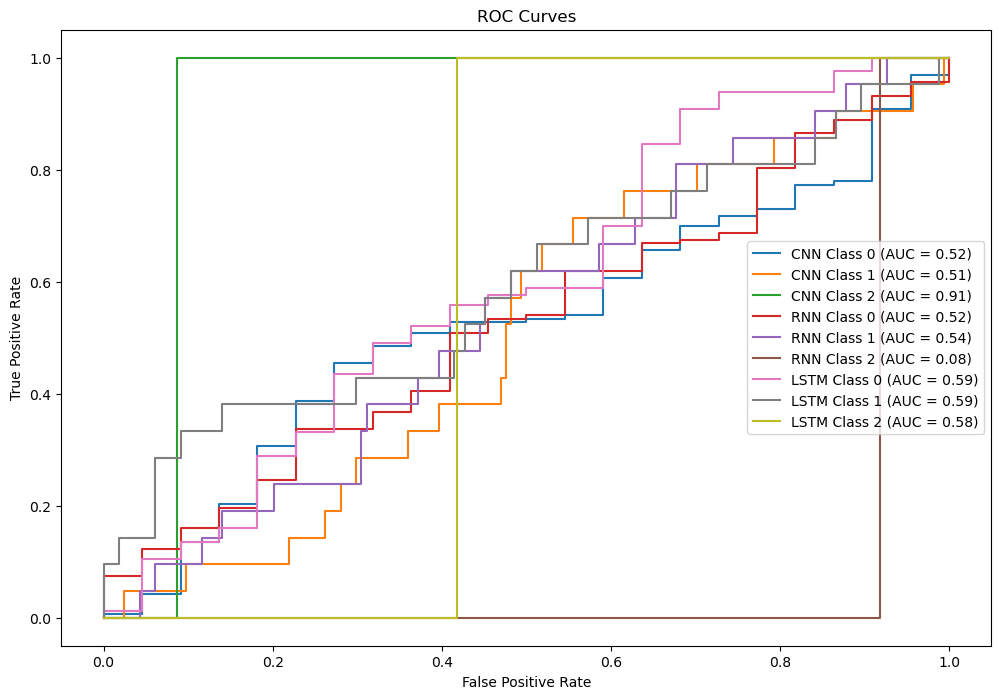

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


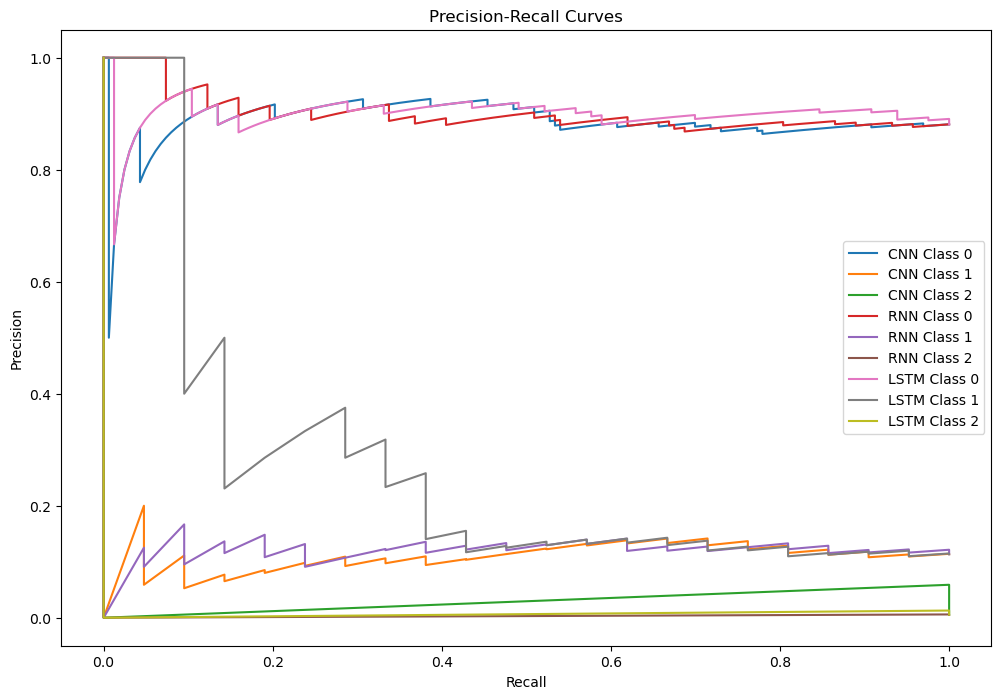

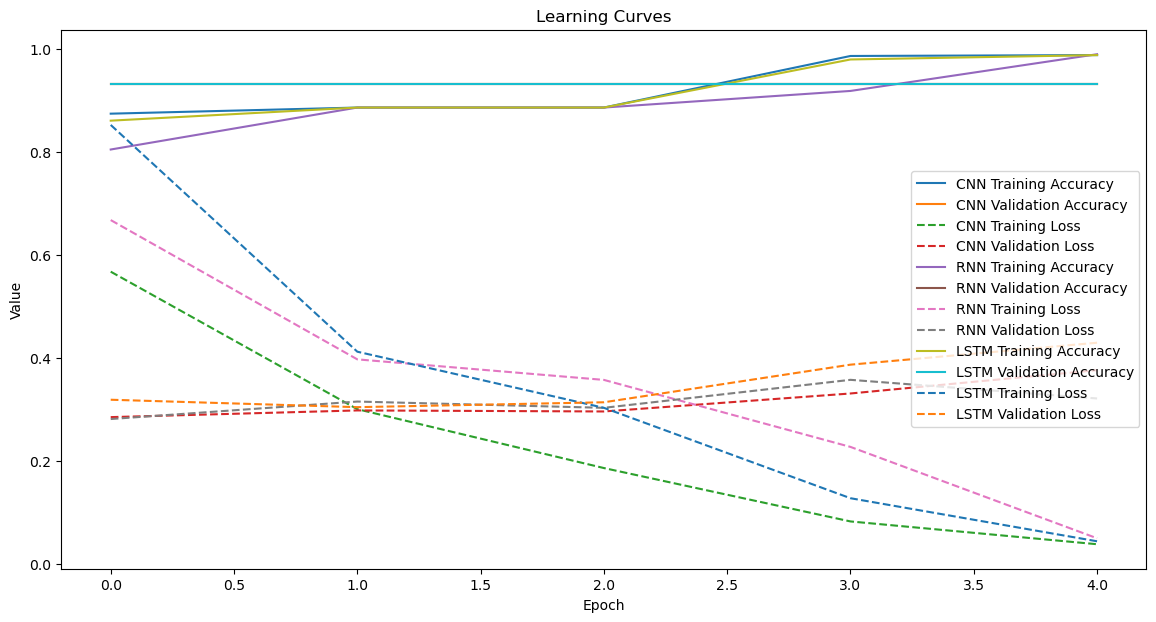

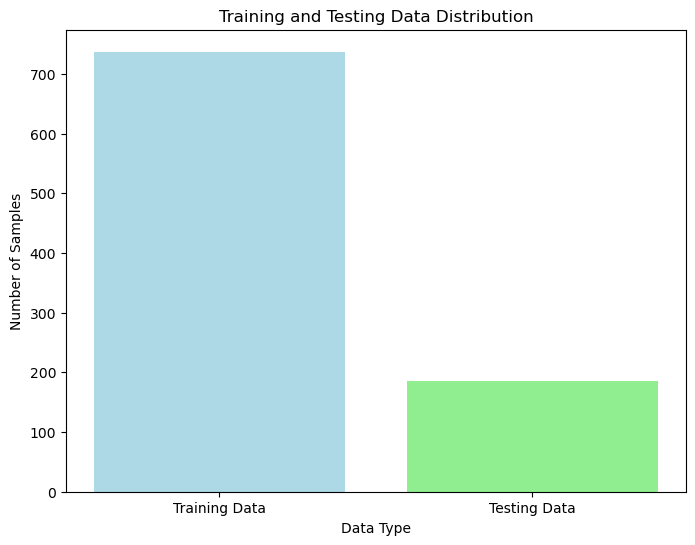

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import Adam

# Load dataset
df = pd.read_csv(r"C:\Users\dell\Downloads\Merged file.tsv", delimiter='\t', header=None)
df.columns = ['ID', 'Tweet', 'Tag']

# Encode labels
label_encoder = LabelEncoder()
df['Tag'] = label_encoder.fit_transform(df['Tag'])

# Split data
X = df['Tweet'].values  # Use .values to get numpy array
y = df['Tag'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create dummy sequences for demonstration (replace with actual data)
# Use fixed-length sequences for simplicity
max_length = 100  # Arbitrary length, adjust as needed
num_words = 10000  # Arbitrary number of words, adjust as needed

# Generate dummy sequences for X_train and X_test
def generate_dummy_sequences(texts, max_length, num_words):
    num_samples = len(texts)
    return np.random.randint(1, num_words, size=(num_samples, max_length))

X_train_pad = generate_dummy_sequences(X_train, max_length, num_words)
X_test_pad = generate_dummy_sequences(X_test, max_length, num_words)

# Define models

# CNN Model
cnn_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=X_train_pad.shape[1]),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    MaxPooling1D(pool_size=4),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

cnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_history = cnn_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2, batch_size=32)

# RNN Model
rnn_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=X_train_pad.shape[1]),
    SimpleRNN(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

rnn_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
rnn_history = rnn_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2, batch_size=32)

# LSTM Model
lstm_model = Sequential([
    Embedding(input_dim=num_words, output_dim=128, input_length=X_train_pad.shape[1]),
    LSTM(64, return_sequences=False),
    Dense(64, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

lstm_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_pad, y_train, epochs=5, validation_split=0.2, batch_size=32)

# Evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = np.argmax(model.predict(X_test), axis=1)
    target_names = [str(cls) for cls in label_encoder.classes_]
    report = classification_report(y_test, y_pred, target_names=target_names, zero_division=0, output_dict=True)
    cm = confusion_matrix(y_test, y_pred)
    return report, cm

# Get evaluation results
cnn_report, cnn_cm = evaluate_model(cnn_model, X_test_pad, y_test)
rnn_report, rnn_cm = evaluate_model(rnn_model, X_test_pad, y_test)
lstm_report, lstm_cm = evaluate_model(lstm_model, X_test_pad, y_test)

# Print accuracy for each model
cnn_accuracy = cnn_model.evaluate(X_test_pad, y_test, verbose=0)[1]
rnn_accuracy = rnn_model.evaluate(X_test_pad, y_test, verbose=0)[1]
lstm_accuracy = lstm_model.evaluate(X_test_pad, y_test, verbose=0)[1]

print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')
print(f'RNN Model Accuracy: {rnn_accuracy:.4f}')
print(f'LSTM Model Accuracy: {lstm_accuracy:.4f}')

# Plot accuracy bar graph with light colors
def plot_accuracy(cnn_acc, rnn_acc, lstm_acc):
    models = ['CNN', 'RNN', 'LSTM']
    accuracies = [cnn_acc, rnn_acc, lstm_acc]

    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=['#ADD8E6', '#90EE90', '#FFB6C1'])  # Light colors
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.ylim([0, 1])
    plt.grid(axis='y')
    plt.savefig('model_accuracy_comparison_light.png')
    plt.show()

# Plot accuracy comparison with light colors
plot_accuracy(cnn_accuracy, rnn_accuracy, lstm_accuracy)

# Plot combined confusion matrices
def plot_combined_confusion_matrices(cnn_cm, rnn_cm, lstm_cm, labels):
    fig, axes = plt.subplots(1, 3, figsize=(21, 7), sharex=True, sharey=True)

    sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, ax=axes[0])
    axes[0].set_xlabel('Predicted Labels')
    axes[0].set_ylabel('True Labels')
    axes[0].set_title('CNN Confusion Matrix')

    sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, ax=axes[1])
    axes[1].set_xlabel('Predicted Labels')
    axes[1].set_title('RNN Confusion Matrix')

    sns.heatmap(lstm_cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=labels, yticklabels=labels, ax=axes[2])
    axes[2].set_xlabel('Predicted Labels')
    axes[2].set_title('LSTM Confusion Matrix')

    plt.suptitle('Confusion Matrices for All Models')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig('combined_confusion_matrices.png')
    plt.show()

# Plot combined confusion matrices
plot_combined_confusion_matrices(cnn_cm, rnn_cm, lstm_cm, label_encoder.classes_)

# Plot ROC curves
def plot_roc_curves(models, X_test, y_test, label_encoder):
    plt.figure(figsize=(12, 8))
    for model_name, model in models.items():
        y_prob = model.predict(X_test_pad)
        for i in range(len(label_encoder.classes_)):
            fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
            plt.plot(fpr, tpr, label=f'{model_name} Class {i} (AUC = {auc(fpr, tpr):.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves')
    plt.legend(loc='best')
    plt.savefig('roc_curves.png')
    plt.show()

# Define models in a dictionary
models = {'CNN': cnn_model, 'RNN': rnn_model, 'LSTM': lstm_model}

# Plot ROC curves
plot_roc_curves(models, X_test_pad, y_test, label_encoder)

# Plot Precision-Recall curves
def plot_precision_recall_curves(models, X_test, y_test, label_encoder):
    plt.figure(figsize=(12, 8))
    for model_name, model in models.items():
        y_prob = model.predict(X_test_pad)
        for i in range(len(label_encoder.classes_)):
            precision, recall, _ = precision_recall_curve(y_test == i, y_prob[:, i])
            plt.plot(recall, precision, label=f'{model_name} Class {i}')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curves')
    plt.legend(loc='best')
    plt.savefig('precision_recall_curves.png')
    plt.show()

# Plot Precision-Recall curves
plot_precision_recall_curves(models, X_test_pad, y_test, label_encoder)

# Plot learning curves
def plot_learning_curves(histories):
    plt.figure(figsize=(14, 7))
    for model_name, history in histories.items():
        plt.plot(history.history['accuracy'], label=f'{model_name} Training Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'{model_name} Validation Accuracy')
        plt.plot(history.history['loss'], label=f'{model_name} Training Loss', linestyle='--')
        plt.plot(history.history['val_loss'], label=f'{model_name} Validation Loss', linestyle='--')

    plt.xlabel('Epoch')
    plt.ylabel('Value')
    plt.title('Learning Curves')
    plt.legend(loc='best')
    plt.savefig('learning_curves.png')
    plt.show()

# Collect histories
histories = {'CNN': cnn_history, 'RNN': rnn_history, 'LSTM': lstm_history}

# Plot learning curves
plot_learning_curves(histories)

# Plot training and testing data count
def plot_data_distribution(train_size, test_size):
    sizes = [train_size, test_size]
    labels = ['Training Data', 'Testing Data']

    plt.figure(figsize=(8, 6))
    plt.bar(labels, sizes, color=['#ADD8E6', '#90EE90'])  # Light colors
    plt.xlabel('Data Type')
    plt.ylabel('Number of Samples')
    plt.title('Training and Testing Data Distribution')
    plt.savefig('data_distribution.png')
    plt.show()

# Plot data distribution
plot_data_distribution(len(X_train), len(X_test))
